### Lista de Verificação do Projeto de Aprendizado de Máquina ### 

1. Foque o problema e olhe para o quadro geral;
2. Obtenha os dados;
3. Explore os dados para obter insights;
4. Prepare os dados para melhor expor os padrões de dados subjacentes aos algoritmos do Aprendizado de Máquina;
5. Explore vários diferentes modelos e liste os melhores;
6. Ajuste seus modelos e combine-os em uma ótima solução;
7. Apresente sua solução;
8. Lance, monitore e faça a manutenção de seu sistema.


### Estratégia e Planejamento do Projeto - Previsão de Vendas BIGMART###

##1. Defina o objetivo em termos de negócios;

Os cientistas de dados da BigMart coletaram dados de vendas de 2013 para 1559 produtos em 10 lojas em diferentes cidades. Além disso, determinados atributos de cada produto e loja foram definidos. O objetivo é construir um modelo preditivo e prever as vendas de cada produto em um determinado ponto de venda.

Anotação Márcio Rodrigues: 

O principal objetivo  é a previsão de venda quantidade de um produto específico por loja. 

Atributos relacionado a loja: 

*Item_Type ---- A categoria à qual o produto pertence

*Outlet_Identifier ----ID de loja única

*Outlet_Establishment_Year ---- O ano em que a loja foi criada

*Outlet_Size ---- O tamanho da loja em termos de área coberta

*Outlet_Location_Type ---- O tipo de cidade em que a loja está localizada

*Outlet_Type ---- Seja o ponto de venda apenas uma mercearia ou algum tipo de supermercado

##2. Como sua solução será usada? 

Usando este modelo, BigMart tentará entender as propriedades dos produtos e pontos de venda que desempenham um papel fundamental no aumento das vendas.

##3. Quais são as soluções atuais/soluções alternativas (se houver)?

Nesse momento é hora de entender o processo e definir as alternativas atuais do momento. É preciso prever as vendas do conjunto de dados de teste. 

## 4. Como você deve enquadrar esse problema (supervisionado, não supervisionado,online/offline, etc.)?

Claramente temos uma tarefa típica de aprendizado de maquina SUPERVISIONADO, uma vez que você recebe exemplos rotulados de treinamento (cada instância vem com o resultado esperado, ou seja, o volume de venda por produto e ponto de venda). Além disso, também é uma tarefa típica de regressão, já que você é solicitado a prever o volume de Vendas. Trata-se de um problema de regressão Multivariada. 

Inicialmente, não há um fluxo contínuo de dados entranto no sistema, então, não tem necessidade de haver atualização do modelo à alternancia dos dados. Nesse caso, podemos tratar como aprendizado em lote. 

## 5. Como o desempenho deve ser medido?

Uma medida típica de desempenho para problemas de regressão é a Raiz do Erro Quadrático Médio (RMSE) e Erro Médio Absoluto (MAE). 


## Elencando as Hipósteses

### Carregando os pacotes e função básicas


In [ ]:
# Importing required libraries
!pip install geopandas
import pandas as pd
import numpy as np
from numpy.random import seed
seed(123)
import matplotlib.pyplot as plt
%matplotlib inline
from datetime import datetime
import seaborn as sns
import geopandas as gpd
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split, cross_val_score
import xgboost as xgb
from xgboost import plot_importance
from sklearn.metrics import explained_variance_score, mean_squared_error, r2_score
import time
from keras import models, layers, optimizers, regularizers
from keras.utils.vis_utils import model_to_dot
from IPython.display import SVG
from statsmodels.tsa.seasonal import seasonal_decompose

     |████████████████████████████████| 1.0MB 4.3MB/s 
     |████████████████████████████████| 6.6MB 32.9MB/s 
     |████████████████████████████████| 15.4MB 186kB/s 


/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


### Importando os dados os dados

## Dicionários dos dados

Temos o conjunto de dados de trem (8523) e de teste (5681), o conjunto de dados de trem tem variáveis ​​de entrada e de saída. Você precisa prever as vendas do conjunto de dados de teste.


Variável	Descrição

* Item_Identifier	  ---- ID de produto exclusivo

* Item_Weight	    ---- Peso do produto

* Item_Fat_Content	---- Se o produto tem baixo teor de gordura ou não

* Item_Visibility	   ---- A% da área total de exibição de todos os produtos em uma loja alocada para o produto específico

* Item_Type	   ---- A categoria à qual o produto pertence

* Item_MRP	       ---- Preço máximo de varejo (preço de lista) do produto

* Outlet_Identifier ----ID de loja única

* Outlet_Establishment_Year	---- O ano em que a loja foi criada

* Outlet_Size	     ---- O tamanho da loja em termos de área coberta

* Outlet_Location_Type	---- O tipo de cidade em que a loja está localizada

* Outlet_Type	       ---- Seja o ponto de venda apenas uma mercearia ou algum tipo de supermercado

* Item_Outlet_Sales ----Vendas do produto na loja específica. Esta é a variável de resultado a ser previsto.

In [ ]:
# Bibliotecas importantes
!pip install geopandas
!pip install remodel
import pandas as pd
import numpy as np
from numpy.random import seed
seed(123)
import matplotlib.pyplot as plt
%matplotlib inline
from datetime import datetime
import seaborn as sns
import geopandas as gpd
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split, cross_val_score
import xgboost as xgb
from xgboost import plot_importance
from sklearn.metrics import explained_variance_score, mean_squared_error, r2_score
import time
from keras import models, layers, optimizers, regularizers
from keras.utils.vis_utils import model_to_dot
from IPython.display import SVG
from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.linear_model import LinearRegression

import os
import calendar
import numpy as np
import networkx as nx
import pandas as pd
from pandas.plotting import scatter_matrix, parallel_coordinates
import seaborn as sns
from sklearn import preprocessing
import matplotlib.pylab as plt
import plotly.express as px

     |████████████████████████████████| 163kB 4.9MB/s 
  Created wheel for remodel: filename=remodel-1.0.0-cp37-none-any.whl size=22996 sha256=ac9ec7080f4a95df89d62f47f79262d261b611338452e680899992521bb03fbb
  Stored in directory: /root/.cache/pip/wheels/b1/d7/f8/86504c5b0cd6d4349d8f4f0bb1f1611c43466b4beafd399859
Successfully built remodel


## Carregando o conjunto de dados

In [ ]:
# Carregando o Conjunto de dados de Treinamento
import pandas as pd
import gc
import os

trein = pd.read_csv('/content/drive/MyDrive/MARCIO RODRIGUES/025_ESTUDO_BOOK/001_Aprendizado de Máquina com Scikit-Learn & TensorFlow/Estudo de Caso - BigMART/train_v9rqX0R.csv', index_col=None)
trein_rep = trein.copy()

# Criando um atributo para diferenciar base treinamento versos teste
trein_rep['type_sample'] = 0

# Combinando o conjunto Treinamento e teste no mesmo dataframe
df = trein_rep


In [ ]:
# Carregando o Conjunto de dados de teste

test = pd.read_csv("/content/drive/MyDrive/MARCIO RODRIGUES/025_ESTUDO_BOOK/001_Aprendizado de Máquina com Scikit-Learn & TensorFlow/Estudo de Caso - BigMART/test_AbJTz2l.csv", index_col=None)
test_rep = test.copy()

# Criando um atributo para diferenciar base treinamento versos teste

test_rep['type_sample'] = 1

# Combinando o conjunto Treinamento e teste no mesmo dataframe

df = pd.concat([trein_rep, test_rep], axis=0, copy=True, ignore_index=True)

In [ ]:
# Estrutura de dados
df


,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,type_sample
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,0
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,0
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,0
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800,0
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
14199,FDB58,10.50,Regular,0.013496,Snack Foods,141.3154,OUT046,1997,Small,Tier 1,Supermarket Type1,NaN,1
14200,FDD47,7.60,Regular,0.142991,Starchy Foods,169.1448,OUT018,2009,Medium,Tier 3,Supermarket Type2,NaN,1
14201,NCO17,10.00,Low Fat,0.073529,Health and Hygiene,118.7440,OUT045,2002,NaN,Tier 2,Supermarket Type1,NaN,1
14202,FDJ26,15.30,Regular,0.000000,Canned,214.6218,OUT017,2007,NaN,Tier 2,Supermarket Type1,NaN,1


In [ ]:
# Analisando a descrição dos dados
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14204 entries, 0 to 14203
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            14204 non-null  object 
 1   Item_Weight                11765 non-null  float64
 2   Item_Fat_Content           14204 non-null  object 
 3   Item_Visibility            14204 non-null  float64
 4   Item_Type                  14204 non-null  object 
 5   Item_MRP                   14204 non-null  float64
 6   Outlet_Identifier          14204 non-null  object 
 7   Outlet_Establishment_Year  14204 non-null  int64  
 8   Outlet_Size                10188 non-null  object 
 9   Outlet_Location_Type       14204 non-null  object 
 10  Outlet_Type                14204 non-null  object 
 11  Item_Outlet_Sales          8523 non-null   float64
 12  type_sample                14204 non-null  int64  
dtypes: float64(4), int64(2), object(7)
memory usag

É possível notar no output acima, há duas variáveis apresentam inferior as demais, "Item_Weight" e "Outlet_Size". É importante também destacar que o dataframe "all_data", combina as bases de treinamento e teste. 

In [ ]:
## Explorando a base de dados - Confirmando a quantidade de Missing por variável
df.isna().sum()

Item_Identifier                 0
Item_Weight                  2439
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  4016
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales            5681
type_sample                     0
dtype: int64

In [ ]:
df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales,type_sample
count,11765.000000,14204.000000,14204.000000,14204.000000,8523.000000,14204.000000
mean,12.792854,0.065953,141.004977,1997.830681,2181.288914,0.399958
std,4.652502,0.051459,62.086938,8.371664,1706.499616,0.489907
min,4.555000,0.000000,31.290000,1985.000000,33.290000,0.000000
25%,8.710000,0.027036,94.012000,1987.000000,834.247400,0.000000
50%,12.600000,0.054021,142.247000,1999.000000,1794.331000,0.000000
75%,16.750000,0.094037,185.855600,2004.000000,3101.296400,1.000000
max,21.350000,0.328391,266.888400,2009.000000,13086.964800,1.000000


In [ ]:
print(df["Item_Weight"].isna().sum())
df["Item_Weight"].sample(10)

2439


360      12.10
2615       NaN
9236     13.00
5395      9.80
11627      NaN
7646     13.65
3856     12.15
10891    20.00
14178      NaN
4778     15.15
Name: Item_Weight, dtype: float64

In [ ]:
df.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales', 'type_sample'],
      dtype='object')

## Tratando as Variáveis Categoricas

Variável	Descrição

* Item_Fat_Content	---- Se o produto tem baixo teor de gordura ou não

* Item_Type	   ---- A categoria à qual o produto pertence

* Outlet_Size	     ---- O tamanho da loja em termos de área coberta

* Outlet_Location_Type	---- O tipo de cidade em que a loja está localizada

* Outlet_Type	       ---- Seja o ponto de venda apenas uma mercearia ou algum tipo de supermercado


###  Item_Fat_Content

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14204 entries, 0 to 14203
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            14204 non-null  object 
 1   Item_Weight                11765 non-null  float64
 2   Item_Fat_Content           14204 non-null  object 
 3   Item_Visibility            14204 non-null  float64
 4   Item_Type                  14204 non-null  object 
 5   Item_MRP                   14204 non-null  float64
 6   Outlet_Identifier          14204 non-null  object 
 7   Outlet_Establishment_Year  14204 non-null  int64  
 8   Outlet_Size                10188 non-null  object 
 9   Outlet_Location_Type       14204 non-null  object 
 10  Outlet_Type                14204 non-null  object 
 11  Item_Outlet_Sales          8523 non-null   float64
 12  type_sample                14204 non-null  int64  
dtypes: float64(4), int64(2), object(7)
memory usag

In [ ]:
# Frequencia da variável "Item_Fat_Content"
df.Item_Fat_Content.value_counts()

Low Fat    8485
Regular    4824
LF          522
reg         195
low fat     178
Name: Item_Fat_Content, dtype: int64

In [ ]:
# Corrigindo a descrição das variável "Item_Fat_Content"
df.Item_Fat_Content.replace('LF', 'Low Fat', inplace=True)
df.Item_Fat_Content.replace('low fat', 'Low Fat', inplace=True)
df.Item_Fat_Content.replace('reg', 'Regular', inplace=True)
df.Item_Fat_Content.value_counts()

Low Fat    9185
Regular    5019
Name: Item_Fat_Content, dtype: int64

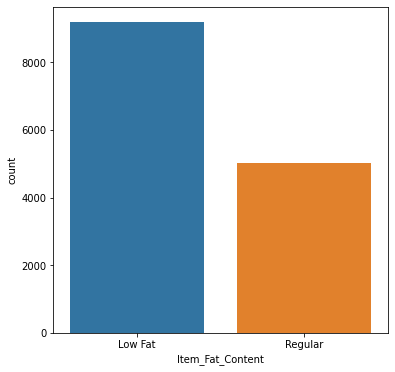

In [ ]:
plt.figure(figsize=(6,6))
sns.countplot(x='Item_Fat_Content', data=df)
plt.show()

In [ ]:
# Tornando as variavel "Item_Fat_Content" binária
df = pd.get_dummies(df, columns=["Item_Fat_Content"], prefix=["Item_Fat_Content"])


### Item_Type

In [ ]:
# Frequencia da variável "Item_Type"
df.Item_Type.value_counts()

Fruits and Vegetables    2013
Snack Foods              1989
Household                1548
Frozen Foods             1426
Dairy                    1136
Baking Goods             1086
Canned                   1084
Health and Hygiene        858
Meat                      736
Soft Drinks               726
Breads                    416
Hard Drinks               362
Others                    280
Starchy Foods             269
Breakfast                 186
Seafood                    89
Name: Item_Type, dtype: int64

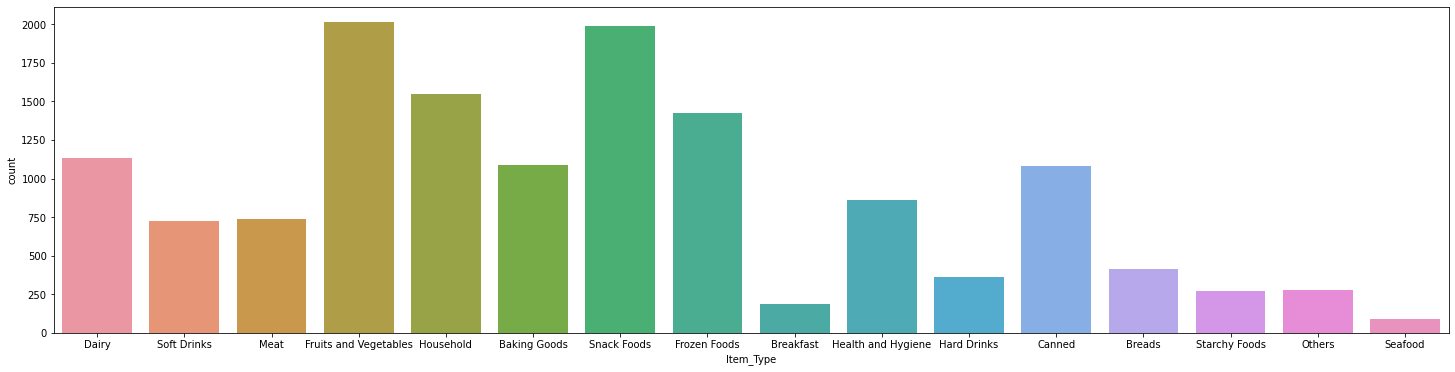

In [ ]:
plt.figure(figsize=(25,6))
sns.countplot(x='Item_Type', data=df)
plt.show()

In [ ]:
#df['Item_Type','Item_Weight'] = df.groupby['Item_Type','Item_Weight'].fillna((df['Item_Type','Item_Weight'].mean()))

df["Item_Weight"] = df.groupby("Item_Type").transform(lambda x: x.fillna(x.mean()))

In [ ]:
# Tornando as variavel "Item_Type" binária
df = pd.get_dummies(df, columns=["Item_Type"], prefix=["Item_Type"])

### Outlet_Size

In [ ]:
# Frequencia da variável "Outlet_Size"
df.Outlet_Size.value_counts()

Medium    4655
Small     3980
High      1553
Name: Outlet_Size, dtype: int64

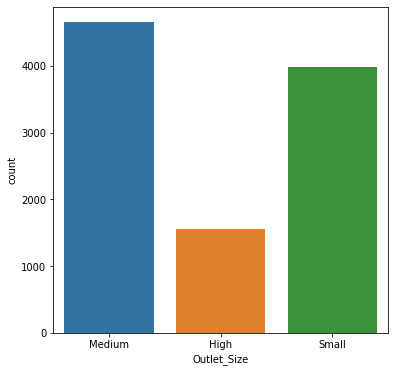

In [ ]:
plt.figure(figsize=(6,6))
sns.countplot(x='Outlet_Size', data=df)
plt.show()

In [ ]:
# Gerando um variável missing para categoria Outlet_Size
df.Outlet_Size.fillna("Missing", inplace=True)
df.Outlet_Size.value_counts()

Medium     4655
Missing    4016
Small      3980
High       1553
Name: Outlet_Size, dtype: int64

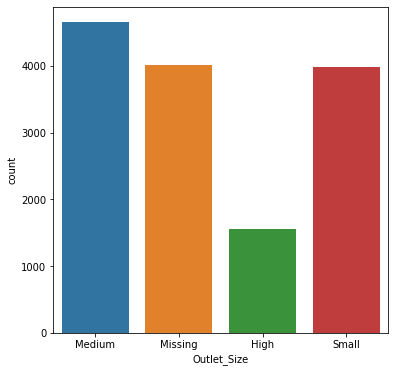

In [ ]:
plt.figure(figsize=(6,6))
sns.countplot(x='Outlet_Size', data=df)
plt.show()

In [ ]:
# Tornando as variavel "Outlet_Size" binária
df = pd.get_dummies(df, columns=["Outlet_Size"], prefix=["Outlet_Size"])

### Outlet_Type

In [ ]:
# Frequencia da variável "Outlet_Type"
df.Outlet_Type.value_counts()

Supermarket Type1    9294
Grocery Store        1805
Supermarket Type3    1559
Supermarket Type2    1546
Name: Outlet_Type, dtype: int64

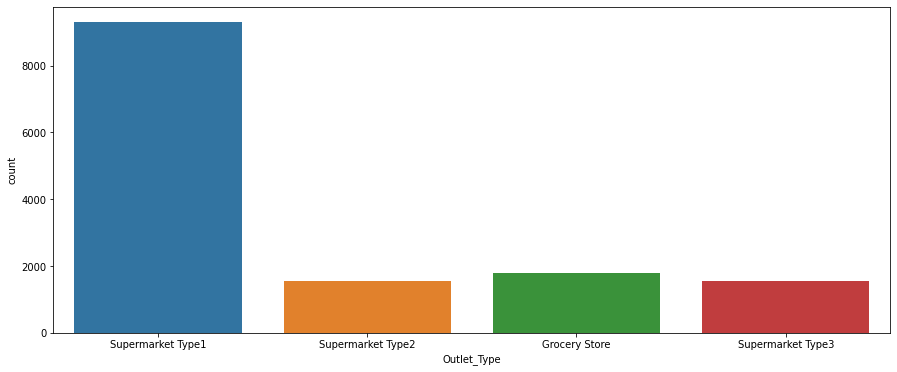

In [ ]:
plt.figure(figsize=(15,6))
sns.countplot(x='Outlet_Type', data=df)
plt.show()

In [ ]:
# Tornando as variavel "Outlet_Type" binária
df = pd.get_dummies(df, columns=["Outlet_Type"], prefix=["Outlet_Type"])

### Outlet_Location_Type

In [ ]:
# Frequencia da variável "Outlet_Location_Type"
df.Outlet_Location_Type.value_counts()

Tier 3    5583
Tier 2    4641
Tier 1    3980
Name: Outlet_Location_Type, dtype: int64

In [ ]:
# Tornando as variavel "Outlet_Type" binária
df = pd.get_dummies(df, columns=["Outlet_Location_Type"], prefix=["Outlet_Location_Type"])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14204 entries, 0 to 14203
Data columns (total 37 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Item_Identifier                  14204 non-null  object 
 1   Item_Weight                      14204 non-null  float64
 2   Item_Visibility                  14204 non-null  float64
 3   Item_MRP                         14204 non-null  float64
 4   Outlet_Identifier                14204 non-null  object 
 5   Outlet_Establishment_Year        14204 non-null  int64  
 6   Item_Outlet_Sales                8523 non-null   float64
 7   type_sample                      14204 non-null  int64  
 8   Item_Fat_Content_Low Fat         14204 non-null  uint8  
 9   Item_Fat_Content_Regular         14204 non-null  uint8  
 10  Item_Type_Baking Goods           14204 non-null  uint8  
 11  Item_Type_Breads                 14204 non-null  uint8  
 12  Item_Type_Breakfas

## Tratando as Variáveis Quantitativas

Variável	Descrição


* Item_Weight	    ---- Peso do produto

* Item_Visibility	   ---- A% da área total de exibição de todos os produtos em uma loja alocada para o produto específico

* Item_MRP	       ---- Preço máximo de varejo (preço de lista) do produto

* Outlet_Establishment_Year	---- O ano em que a loja foi criada

* Item_Outlet_Sales ----Vendas do produto na loja específica. Esta é a variável de resultado a ser previsto.

### Item_Weight 


In [ ]:
# Frequencia da variável "Item_Weight "
df.Item_Weight.value_counts()

13.194406    346
12.865732    336
13.337977    263
12.569323    251
13.238358    195
            ... 
7.275000       7
8.310000       7
9.035000       6
4.615000       6
7.850000       6
Name: Item_Weight, Length: 431, dtype: int64

In [ ]:
#df['Item_Weight'] = df['Item_Weight'].fillna((df['Item_Weight'].mean()))


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



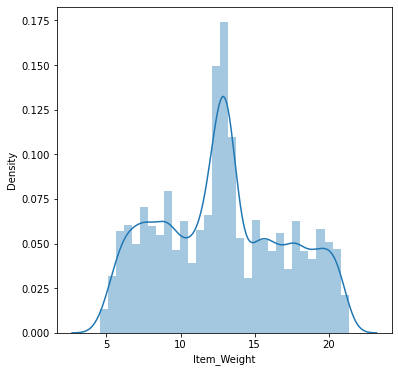

In [ ]:
plt.figure(figsize=(6,6))
sns.distplot(df['Item_Weight'])
plt.show()

### Item_Visibility 


In [ ]:
# Frequencia da variável "Item_Visibility"
df.Item_Visibility.value_counts()

0.000000    879
0.076856      3
0.076841      3
0.077290      3
0.077169      3
           ... 
0.209684      1
0.019592      1
0.013530      1
0.008772      1
0.066817      1
Name: Item_Visibility, Length: 13006, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



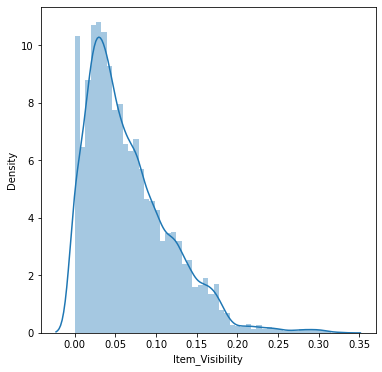

In [ ]:
plt.figure(figsize=(6,6))
sns.distplot(df['Item_Visibility'])
plt.show()

### Item_MRP

In [ ]:
# Frequencia da variável "Item_MRP
df.Item_MRP.value_counts()

172.0422    8
179.7660    7
127.1020    7
177.9370    7
123.1046    7
           ..
176.9712    1
253.6014    1
118.4808    1
230.8010    1
192.0188    1
Name: Item_MRP, Length: 8052, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



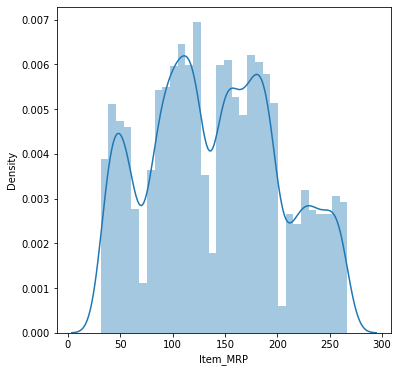

In [ ]:
plt.figure(figsize=(6,6))
sns.distplot(df['Item_MRP'])
plt.show()

### Outlet_Establishment_Year

In [ ]:
# Frequencia da variável "Outlet_Establishment_Year "
df.Outlet_Establishment_Year.value_counts()

1985    2439
1987    1553
1999    1550
1997    1550
2004    1550
2002    1548
2009    1546
2007    1543
1998     925
Name: Outlet_Establishment_Year, dtype: int64

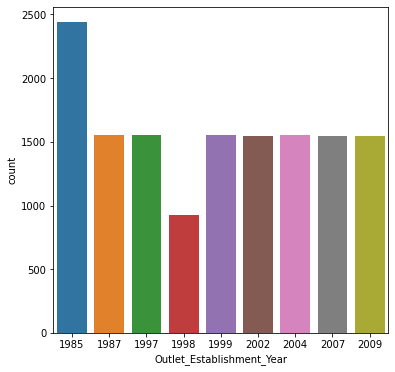

In [ ]:
plt.figure(figsize=(6,6))
sns.countplot(x='Outlet_Establishment_Year', data=df)
plt.show()

In [ ]:
# Criando um atributo tempo de operação da loja - "Years_of_Operation"
df['Years_of_Operation'] = 2013- df['Outlet_Establishment_Year'] 

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14204 entries, 0 to 14203
Data columns (total 38 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Item_Identifier                  14204 non-null  object 
 1   Item_Weight                      14204 non-null  float64
 2   Item_Visibility                  14204 non-null  float64
 3   Item_MRP                         14204 non-null  float64
 4   Outlet_Identifier                14204 non-null  object 
 5   Outlet_Establishment_Year        14204 non-null  int64  
 6   Item_Outlet_Sales                8523 non-null   float64
 7   type_sample                      14204 non-null  int64  
 8   Item_Fat_Content_Low Fat         14204 non-null  uint8  
 9   Item_Fat_Content_Regular         14204 non-null  uint8  
 10  Item_Type_Baking Goods           14204 non-null  uint8  
 11  Item_Type_Breads                 14204 non-null  uint8  
 12  Item_Type_Breakfas

In [ ]:
# Frequencia da variável "Years_of_Operation "
df.Years_of_Operation.value_counts()

28    2439
26    1553
14    1550
9     1550
16    1550
11    1548
4     1546
6     1543
15     925
Name: Years_of_Operation, dtype: int64

In [ ]:
df.head()

,Item_Identifier,Item_Weight,Item_Visibility,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Item_Outlet_Sales,type_sample,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Item_Type_Baking Goods,Item_Type_Breads,Item_Type_Breakfast,Item_Type_Canned,Item_Type_Dairy,Item_Type_Frozen Foods,Item_Type_Fruits and Vegetables,Item_Type_Hard Drinks,Item_Type_Health and Hygiene,Item_Type_Household,Item_Type_Meat,Item_Type_Others,Item_Type_Seafood,Item_Type_Snack Foods,Item_Type_Soft Drinks,Item_Type_Starchy Foods,Outlet_Size_High,Outlet_Size_Medium,Outlet_Size_Missing,Outlet_Size_Small,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Years_of_Operation
0,FDA15,9.30,0.016047,249.8092,OUT049,1999,3735.1380,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,14
1,DRC01,5.92,0.019278,48.2692,OUT018,2009,443.4228,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1,4
2,FDN15,17.50,0.016760,141.6180,OUT049,1999,2097.2700,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,14
3,FDX07,19.20,0.000000,182.0950,OUT010,1998,732.3800,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,15
4,NCD19,8.93,0.000000,53.8614,OUT013,1987,994.7052,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,26


### Item_Outlet_Sales (Variável Resposta)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



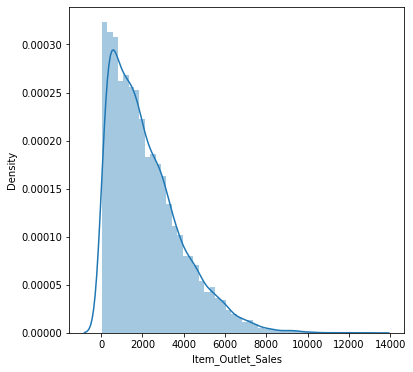

In [ ]:
plt.figure(figsize=(6,6))
sns.distplot(df['Item_Outlet_Sales'])
plt.show()

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14204 entries, 0 to 14203
Data columns (total 38 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Item_Identifier                  14204 non-null  object 
 1   Item_Weight                      14204 non-null  float64
 2   Item_Visibility                  14204 non-null  float64
 3   Item_MRP                         14204 non-null  float64
 4   Outlet_Identifier                14204 non-null  object 
 5   Outlet_Establishment_Year        14204 non-null  int64  
 6   Item_Outlet_Sales                8523 non-null   float64
 7   type_sample                      14204 non-null  int64  
 8   Item_Fat_Content_Low Fat         14204 non-null  uint8  
 9   Item_Fat_Content_Regular         14204 non-null  uint8  
 10  Item_Type_Baking Goods           14204 non-null  uint8  
 11  Item_Type_Breads                 14204 non-null  uint8  
 12  Item_Type_Breakfas

In [ ]:
df

,Item_Identifier,Item_Weight,Item_Visibility,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Item_Outlet_Sales,type_sample,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Item_Type_Baking Goods,Item_Type_Breads,Item_Type_Breakfast,Item_Type_Canned,Item_Type_Dairy,Item_Type_Frozen Foods,Item_Type_Fruits and Vegetables,Item_Type_Hard Drinks,Item_Type_Health and Hygiene,Item_Type_Household,Item_Type_Meat,Item_Type_Others,Item_Type_Seafood,Item_Type_Snack Foods,Item_Type_Soft Drinks,Item_Type_Starchy Foods,Outlet_Size_High,Outlet_Size_Medium,Outlet_Size_Missing,Outlet_Size_Small,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Years_of_Operation
0,FDA15,9.30,0.016047,249.8092,OUT049,1999,3735.1380,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,14
1,DRC01,5.92,0.019278,48.2692,OUT018,2009,443.4228,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1,4
2,FDN15,17.50,0.016760,141.6180,OUT049,1999,2097.2700,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,14
3,FDX07,19.20,0.000000,182.0950,OUT010,1998,732.3800,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,15
4,NCD19,8.93,0.000000,53.8614,OUT013,1987,994.7052,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,26
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14199,FDB58,10.50,0.013496,141.3154,OUT046,1997,NaN,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,1,0,0,16
14200,FDD47,7.60,0.142991,169.1448,OUT018,2009,NaN,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,1,4
14201,NCO17,10.00,0.073529,118.7440,OUT045,2002,NaN,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,11
14202,FDJ26,15.30,0.000000,214.6218,OUT017,2007,NaN,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,6


## Preparando dos dados para Modelagem

In [ ]:
#Divide into test and train:
train = df.loc[df['type_sample']==0]
test = df.loc[df['type_sample']==1]

In [ ]:
#Drop unnecessary columns:
test.drop(['Item_Outlet_Sales','type_sample','Outlet_Establishment_Year'],axis=1,inplace=True)
train.drop(['type_sample','Outlet_Establishment_Year'],axis=1,inplace=True)

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings # Ignores any warning
warnings.filterwarnings("ignore")

In [ ]:
#Export files as modified versions:
train.to_csv("train_modified.csv",index=False)
test.to_csv("test_modified.csv",index=False)

In [ ]:
train_df = pd.read_csv('train_modified.csv')
test_df = pd.read_csv('test_modified.csv')

In [ ]:
train_df

,Item_Identifier,Item_Weight,Item_Visibility,Item_MRP,Outlet_Identifier,Item_Outlet_Sales,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Item_Type_Baking Goods,Item_Type_Breads,Item_Type_Breakfast,Item_Type_Canned,Item_Type_Dairy,Item_Type_Frozen Foods,Item_Type_Fruits and Vegetables,Item_Type_Hard Drinks,Item_Type_Health and Hygiene,Item_Type_Household,Item_Type_Meat,Item_Type_Others,Item_Type_Seafood,Item_Type_Snack Foods,Item_Type_Soft Drinks,Item_Type_Starchy Foods,Outlet_Size_High,Outlet_Size_Medium,Outlet_Size_Missing,Outlet_Size_Small,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Years_of_Operation
0,FDA15,9.300,0.016047,249.8092,OUT049,3735.1380,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,14
1,DRC01,5.920,0.019278,48.2692,OUT018,443.4228,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1,4
2,FDN15,17.500,0.016760,141.6180,OUT049,2097.2700,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,14
3,FDX07,19.200,0.000000,182.0950,OUT010,732.3800,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,15
4,NCD19,8.930,0.000000,53.8614,OUT013,994.7052,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,26
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,0.056783,214.5218,OUT013,2778.3834,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,26
8519,FDS36,8.380,0.046982,108.1570,OUT045,549.2850,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,11
8520,NCJ29,10.600,0.035186,85.1224,OUT035,1193.1136,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,9
8521,FDN46,7.210,0.145221,103.1332,OUT018,1845.5976,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,4


In [ ]:
#Define target and ID columns:
target = 'Item_Outlet_Sales'
IDcol = ['Item_Identifier','Outlet_Identifier']

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
import sklearn

def modelfit(alg, dtrain, dtest, predictors, target, IDcol, filename):
    #Fit the algorithm on the data
    alg.fit(dtrain[predictors], dtrain[target])
        
    #Predict training set:
    dtrain_predictions = alg.predict(dtrain[predictors])
    
    #Remember the target had been normalized
    Sq_train = (dtrain[target])**2
    #Perform cross-validation:
    cv_score = sklearn.model_selection.cross_val_score(alg, dtrain[predictors],Sq_train, cv=20, scoring='neg_mean_squared_error')
    cv_score = np.sqrt(np.abs(cv_score))
    
    #Print model report:
    print("\nModel Report")
    print("RMSE : %.4g" % np.sqrt(metrics.mean_squared_error(Sq_train.values, dtrain_predictions)))
    print("CV Score : Mean - %.4g | Std - %.4g | Min - %.4g | Max - %.4g" % (np.mean(cv_score),np.std(cv_score),np.min(cv_score),np.max(cv_score)))
    
    #Predict on testing data:
    dtest[target] = alg.predict(dtest[predictors])
    
    #Export submission file:
    IDcol.append(target)
    submission = pd.DataFrame({ x: dtest[x] for x in IDcol})
    submission.to_csv(filename, index=False)

## Modelagem

Referencia: https://medium.com/diogo-menezes-borges/project-1-bigmart-sale-prediction-fdc04f07dc1e

### Modelo 1- Regressõa Linear

In [ ]:
from sklearn.linear_model import LinearRegression
LR = LinearRegression(normalize=True)
predictors = train_df.columns.drop(['Item_Outlet_Sales','Item_Identifier','Outlet_Identifier'])
modelfit(LR, train_df, test_df, predictors, target, IDcol, 'LR.csv')


Model Report
RMSE : 1.4e+07
CV Score : Mean - 9.137e+06 | Std - 1.024e+06 | Min - 7.828e+06 | Max - 1.173e+07


Modelo 2 - MOdelo de Regressõa Ridge

In [ ]:
from sklearn.linear_model import Ridge
RR = Ridge(alpha=0.05,normalize=True)
modelfit(RR, train_df, test_df, predictors, target, IDcol, 'RR.csv')


Model Report
RMSE : 1.4e+07
CV Score : Mean - 9.145e+06 | Std - 1.043e+06 | Min - 7.806e+06 | Max - 1.178e+07


### Decision Tree Mode

In [ ]:
from sklearn.tree import DecisionTreeRegressor
DT = DecisionTreeRegressor(max_depth=15, min_samples_leaf=100)
modelfit(DT, train_df, test_df, predictors, target, IDcol, 'DT.csv')


Model Report
RMSE : 1.4e+07
CV Score : Mean - 8.591e+06 | Std - 8.655e+05 | Min - 7.318e+06 | Max - 1.054e+07


### Random Forrest Model

In [ ]:
RF = DecisionTreeRegressor(max_depth=8, min_samples_leaf=150)
modelfit(RF, train_df, test_df, predictors, target, IDcol,'RF.csv')


Model Report
RMSE : 1.4e+07
CV Score : Mean - 8.605e+06 | Std - 8.915e+05 | Min - 7.429e+06 | Max - 1.081e+07


### XGBoost Model

In [ ]:
from xgboost import XGBRegressor
my_model = XGBRegressor(n_estimators=1000, learning_rate=0.05)
my_model.fit(train_df[predictors], train_df[target], early_stopping_rounds=5,eval_set=[(test_df[predictors], test_df[target])], verbose=False)

In [ ]:
#Predict training set:
train_df_predictions = my_model.predict(train_df[predictors])
# make predictions
predictions = my_model.predict(test_df[predictors])

from sklearn.metrics import mean_absolute_error
print("Mean Absolute Error : " + str(mean_absolute_error(predictions, test_df[target])))
print("RMSE : %.4g" % np.sqrt(metrics.mean_squared_error((train_df[target]).values, train_df_predictions)))



IDcol.append(target)
submission = pd.DataFrame({ x: test_df[x] for x in IDcol})
submission.to_csv("previsao_xgb_reg.csv", index=False)

Mean Absolute Error : 132.69601058608242
RMSE : 1057
